In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('bitcoin-edited-0.csv')

In [3]:
df

,day,price
0,1,135
1,2,134
2,3,144
3,4,139
4,5,116
...,...,...
2030,2031,5560
2031,2032,5621
2032,2033,4864
2033,2034,4466


In [4]:
X=df.iloc[:,0].values
Y=df.iloc[:,1].values

In [5]:
df.dropna(inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=.2)

In [7]:
X

array([   1,    2,    3, ..., 2033, 2034, 2035], dtype=int64)

In [8]:
x_train.size

1628

In [9]:
y_train.size

1628

In [10]:
bestdegree=0
bestscore=0

In [11]:
import matplotlib.pyplot as plt

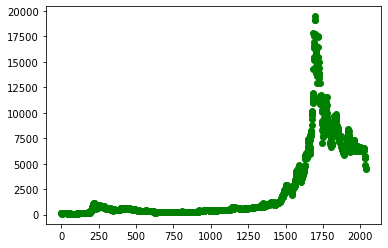

In [12]:
plt.scatter(X,Y,color='green')

In [13]:
import numpy as np
from sklearn.metrics import r2_score

In [14]:
for degree in range(1,40):
    model=np.poly1d(np.polyfit(X,Y,degree))
    accuracy=r2_score(model(X),Y)*100
    if(accuracy>bestscore):
        bestdegree=accuracy
        
    accuracy=int(accuracy)
    print(f'Accuracy for degree {degree} is {accuracy}%')

Accuracy for degree 1 is -1%
Accuracy for degree 2 is 51%
Accuracy for degree 3 is 51%
Accuracy for degree 4 is 66%
Accuracy for degree 5 is 76%
Accuracy for degree 6 is 78%
Accuracy for degree 7 is 79%
Accuracy for degree 8 is 83%
Accuracy for degree 9 is 86%
Accuracy for degree 10 is 86%
Accuracy for degree 11 is 87%
Accuracy for degree 12 is 89%
Accuracy for degree 13 is 90%
Accuracy for degree 14 is 90%
Accuracy for degree 15 is 90%
Accuracy for degree 16 is 91%
Accuracy for degree 17 is 91%
Accuracy for degree 18 is 91%
Accuracy for degree 19 is 91%
Accuracy for degree 20 is 91%
Accuracy for degree 21 is 92%
Accuracy for degree 22 is 92%
Accuracy for degree 23 is 92%
Accuracy for degree 24 is 92%
Accuracy for degree 25 is 92%
Accuracy for degree 26 is 92%
Accuracy for degree 27 is 92%
Accuracy for degree 28 is 92%
Accuracy for degree 29 is 93%
Accuracy for degree 30 is 93%
Accuracy for degree 31 is 93%
Accuracy for degree 32 is 93%
Accuracy for degree 33 is 93%
Accuracy for degree

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.u

In [15]:
print(f'best degree is {bestdegree} with accuracy={accuracy}')

best degree is 93.73872529711606 with accuracy=93


In [16]:
model=np.poly1d(np.polyfit(X,Y,bestdegree))

D:\anaconda\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
D:\anaconda\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
XTest = np.linspace(min(X),max(X),300)

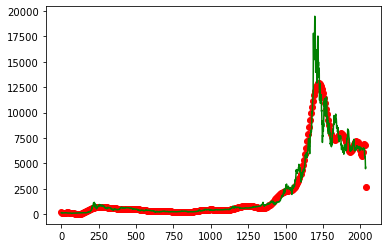

In [18]:
plt.plot(X,Y,c='green')
plt.scatter(XTest,model(XTest),c='red')
plt.show()

In [19]:
day=input(f"price on which day:?")

price on which day:?2023


In [20]:
d1=int(day)
d2=d1+7#one week after 

In [21]:
price=model(d1)
price2=model(d2)

In [22]:
print(f'price on the {day} th of dataset')
print(price)
print('next week : ')
print(price2)

price on the 2023 th of dataset
6985.85359719949
next week : 
6321.046008340406


In [23]:
model.coefficients

array([-2.42292266e-139,  1.34224781e-135, -7.33809159e-133,
       -4.20637965e-129, -3.38357278e-126,  8.07111148e-123,
        2.87273216e-119,  3.66462991e-116, -1.66441274e-113,
       -1.79303003e-109, -4.05667179e-106, -3.97333357e-103,
        4.87862589e-100,  2.87855403e-096,  6.01628076e-093,
        5.28244565e-090, -9.19383353e-087, -4.61255791e-083,
       -8.88885588e-080, -5.51128855e-077,  2.09510654e-073,
        7.66596254e-070,  1.10819070e-066, -3.48579080e-064,
       -5.31436571e-060, -1.07891118e-056, -1.95332303e-054,
        3.99405557e-050,  8.34652619e-047, -2.13360178e-044,
       -3.74267715e-040, -3.67098714e-037,  1.21811839e-033,
        2.13505484e-030, -5.03156780e-027, -5.97992742e-024,
        2.92789792e-020, -4.38753400e-017,  3.77339756e-014,
       -2.09143013e-011,  7.68597440e-009, -1.85145006e-006,
        2.79525783e-004, -2.42748252e-002,  1.05478461e+000,
       -1.80361572e+001,  1.86449222e+002])